# OLS, Ridge Regression and Cross-Validation

Blair is a mage testing how long they can fly a collection of giant peaches. They have $n$ training
peaches – with masses given by $x_1, x_2, . . . x_n$ – and flies these peaches once to collect training data.
The experimental flight time of peach $i$ is given by $y_i$. They believe that the flight time is well
approximated by a polynomial function of the mass \
$y_i ≈ w_0 + w_1 x_i + w_2 x_i^2 + \dots + w_Dx_i^D$ \
where their goal is to fit a polynomial of degree D to this data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from hw1_prob5 import *

In [2]:
data = scipy.io.loadmat("1D_poly.mat")

In [3]:
x = data['x_train'][0]
y = data['y_train'].T[0]

## part a

QUESTION: Show how Blair’s problem can be formulated as a linear regression problem.

The data look like $\textbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}, \textbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$.

The problem can be formulated as:
$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = \begin{bmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^D \\
                                                                         \vdots & \vdots & \vdots & \ddots & \vdots \\
                                                                             1 & x_n & x_n^2 & \cdots & x_n^D \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_D \end{bmatrix}$, which is equivalent to $\textbf{y} = X\textbf{w}$. This is a linear regression problem.

## part b

QUESTION: You are given data of the masses $\{x_i\}_{i=1}^n$ and flying times $\{y_i\}_{i=1}^n$ in the “x train” and “y train” keys of the file 1D poly.mat with the masses centered and normalized to lie in the range [−1, 1]. Write code to perform the least squares fit. You may NOT use numpy.linalg.lstsq, but you can use other linear algebra functions, such as numpy.linalg.solve. Letting $f_D$ denote the fitted polynomial, plot the average training error $R(D) = \frac{1}{n} \sum_{i=1}^n (y_i − f_D(x_i))^2$ against $D$ in the range $D \in \{0, 1, 2, 3, . . . , n − 1\}$.

In [4]:
# part b (1/2)

def least_squares(X, D):
    
    return np.linalg.solve(X.T @ X, (X.T @ y).T) 
    # X is 20xD, y is 20x1 so X.T @ X is DxD and X.T @ y is 1xD (bc of np) so need to do .T
    
def least_squares_error(x, y, D):
    X = np.matrix([x**d for d in range(0, D+1)]).T
    Rs = []
    rolling_sum = 0
    for i in range(len(y)):
        w = least_squares(X, D)
        fitted_i = X[i].dot(w)
        rolling_sum += (y[i] - fitted_i)**2
        Rs.append(y[i] - fitted_i)
    return (np.linalg.norm(Rs) ** 2) / len(x)
    #return rolling_sum/len(x)

Text(0.5, 1.0, 'average training error R(D) against D')

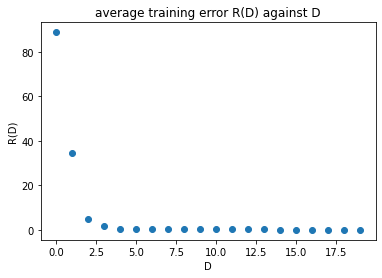

In [5]:
# part b (2/2)

fig = plt.figure()
x_values = [d for d in range(len(x))]
y_values = [least_squares_error(x, y, d) for d in range(len(x))]
    
plt.scatter(x_values, y_values)
plt.xlabel('D')
plt.ylabel('R(D)')
plt.title('average training error R(D) against D')

## part c

QUESTION: How does the average training error behave as a function of D, and why? What happens if you try to fit a polynomial of degree n with a standard matrix inversion method?

The average training error decreases as a function of D. This makes sense, because as D increases, essentially we are just overfitting the training data, so the error would decrease. If you try to fit a polynomial of degree n with the standard matrix inversion method, you'll get a matrix that has n+1 columns, i.e. it does not have full rank. So, it won't be invertible and we might have to use the pseudo-inverse instead.


## part d

QUESTION: Blair has taken CS189 so they decide that they need to run another experiment before deciding that their prediction is true. They run another fresh experiment of flight times using the same peaches, to obtain the data with key “y fresh” in 1D poly.mat. Denoting the fresh flight time of peach $i$ by $\tilde{y}_i$, plot the average error $\tilde{R}(D) = \frac{1}{n} \sum_{i=1}^n (\tilde{y}_i − f_D(x_i))^2$ for the same values of $D$ as in part (b) using the polynomial approximations $f_D$ also from the previous part. How does this plot differ from the plot in (b) and why?

In [6]:
y_fresh = data["y_fresh"].T[0]

Text(0.5, 1.0, 'average training error R(D) for y_fresh against D')

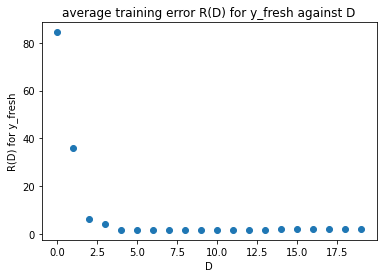

In [7]:
fig = plt.figure()
x_values = [d for d in range(len(x))]
y_fresh_values = [least_squares_error(x, y_fresh, d) for d in range(len(x))]
    
plt.scatter(x_values, y_fresh_values)
plt.xlabel('D')
plt.ylabel('R(D) for y_fresh')
plt.title('average training error R(D) for y_fresh against D')

Text(0.5, 1.0, 'Comparing error for y_train (blue) vs. y_fresh (orange)')

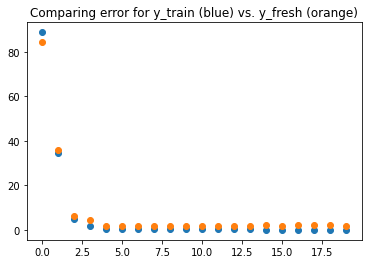

In [8]:
fig = plt.figure()

plt.scatter(x_values, y_values)
plt.scatter(x_values, y_fresh_values)
plt.title('Comparing error for y_train (blue) vs. y_fresh (orange)')

The error for y_fresh increases relative to that of y_train for larger D. This makes sense, because for large D, we'd be overfitting y_train, and hence the model wouldn't fit y_fresh as well, whereas it would be expected to work better for lower D since we aren't overfitting in that case.

## part e

QUESTION: How do you propose using the two plots from parts (b) and (d) to “select” the right polynomial model for Blair?

Since higher values of D result in greater testing error, Blair should use lower degree polynomials. The test errors look like they increase after degrees ~10-11, so it would be better to use polynomials of degree less than that. We also wouldn't want to use a D too small--values between 0 and 3 have quite high error values. So, a polynomial with degree between 5 and 10 would be optimal for Blair.

## part f

QUESTION: Blair has a new hypothesis – the flying time is actually a function of the mass, smoothness, size, and sweetness of the peach, and some multivariate polynomial function of all of these parameters. A $D$-multivariate polynomial function looks like \
$f_D(\textbf{x}) = \sum_j \alpha_j \prod_i x_i^{p_{ji}}$, \
where $\forall j: \sum_i p_{ji} \leq D$. Here $\alpha_j$ is the scale constant for $j$th term and $p_{ji}$ is the exponent of $x_i$ in the $j$th term. The data in polynomial regression samples.mat (100000 × 5) with columns
corresponding to the 5 attributes of the peach. Use 4-fold cross-validation to decide which of $D \in \{0, 1, 2, 3, 4, 5\}$ is the best fit for the data provided. Specifically, the best fit is defined as the choice of parameters that has the lowest mean squared error averaged across the four validation folds. For this part, compute the polynomial coefficients via ridge regression with penalty $\lambda = 0.1$, instead of ordinary least squares. You may not use numpy.linalg.lstsq, but you can use other linear algebra functions, such as numpy.linalg.solve. You should implement the 4-fold cross-validation using only numpy (i.e. do not use sci-kit learn or another machine learning library). The assemble feature function provided in hw1 prob5.py can be used to construct the data matrix representing the D multivariate polynomial basis functions from the 5 raw features.

In [9]:
poly_data = scipy.io.loadmat("polynomial_regression_samples.mat")

In [10]:
x = poly_data['x'] # 100000 x 5
y = poly_data['y'] # 100000 x 1

In [11]:
def fit_ridge_regression(X, y, nu): # nu = 0.1 for part f
    return np.linalg.solve(X.T @ X + nu * np.identity(len(X.T)), X.T @ y)

In [12]:
k = 4 # doing k-fold cross validation

In [13]:
len_folds = int(len(x) / k) # len_folds = 25000
x_folds = [x[len_folds*i:len_folds*(i+1)] for i in range(k)] # e.g. x_fold[1] = xnew[25000:50000]
y_folds = [y[len_folds*i:len_folds*(i+1)] for i in range(k)] # e.g. y_fold[1] = ynew[25000:50000]

In [35]:
# returns the average MSE for a k-fold cross-validation
def mse_for_cross_validation(x_folds, y_folds, D, k, nu):

    running_R_test = 0 # R is the average of the four MSE's, each obtained by using one fold as the test set
    running_R_training = 0 # for testing the goodness of fit on the training set
    for i in range(k): # using each of the four folds in turn as the training set
        x_training = [x_folds[j] for j in range(k) if j != i] # if i = 2, want the 0, 1 and 3rd elements of x_folds
        x_training = np.vstack(x_training) # combine the three folds into one data structure (i.e. matrix)
        x_training = assemble_feature(x_training, D) # create the design matrix for the three folds

        y_training = [y_folds[j] for j in range(k) if j != i] # same as for x
        y_training = np.vstack(y_training)

        fit_i = fit_ridge_regression(x_training, y_training, nu) # w

        x_test = assemble_feature(x_folds[i], D) ## DO THIS PART??
        y_test = y_folds[i]

        rolling_mse_sum_test = 0
        for index in range(len(y_test)): # calculate MSE
            rolling_mse_sum_test += (y_test[index] - x_test[index].dot(fit_i))**2
        MSE_i_test = rolling_mse_sum_test / len(y_test)
        running_R_test += MSE_i_test
        
        rolling_mse_sum_training = 0
        for index in range(len(y_training)): # calculate MSE
            rolling_mse_sum_training += (y_training[index] - x_training[index].dot(fit_i))**2
        MSE_i_training = rolling_mse_sum_training / len(y_training)
        running_R_training += MSE_i_training

    avg_R_test = running_R_test / k
    avg_R_training = running_R_training / k
    return [avg_R_test, avg_R_training]

In [21]:
nu = 0.1 # penalty, specified in question 

list_of_Rs = []
for D in range(6):
    list_of_Rs.append(mse_for_cross_validation(x_folds, y_folds, D, k, nu)[0])

In [22]:
list_of_Rs.index(min(list_of_Rs))

4

The best D is D=4

## part g

QUESTION: Now redo the previous part, but use 4-fold cross-validation on all combinations of $D \in \{1, 2, 3, 4, 5\}$
and $\lambda \in \{0.05, 0.1, 0.15, 0.2\}$ - this is referred to as a grid search. Find the best $D$ and $\lambda$ that best explains the data using ridge regression. Print the average training/validation error per sample for all $D$ and $\lambda$.

In [30]:
gridsearch_Rs_test = []
gridsearch_Rs_training = []
i = 0
for D in range(1, 6):
    gridsearch_Rs_test.append([])
    gridsearch_Rs_training.append([])
    j = 0
    for nu in [0.05, 0.1, 0.15, 0.2]:
        R = mse_for_cross_validation(x_folds, y_folds, D, k, nu)
        R_test, R_training = R[0], R[1]
        gridsearch_Rs_test[i].append(R_test)
        gridsearch_Rs_training[i].append(R_training)
        print('D = ' + str(D) + '; lambda = ' + str(nu) + '; avg. validation error: ' + str(R_test) + '; avg. training error: ' + str(R_training))
        j += 1
    i += 1

D = 1; lambda = 0.05; avg. validation error: [0.05857469]; avg. training error: [0.05856762]
D = 1; lambda = 0.1; avg. validation error: [0.05857469]; avg. training error: [0.05856762]
D = 1; lambda = 0.15; avg. validation error: [0.05857469]; avg. training error: [0.05856762]
D = 1; lambda = 0.2; avg. validation error: [0.05857469]; avg. training error: [0.05856763]
D = 2; lambda = 0.05; avg. validation error: [0.05852113]; avg. training error: [0.05848948]
D = 2; lambda = 0.1; avg. validation error: [0.05852039]; avg. training error: [0.0584902]
D = 2; lambda = 0.15; avg. validation error: [0.05852011]; avg. training error: [0.05849122]
D = 2; lambda = 0.2; avg. validation error: [0.05852016]; avg. training error: [0.05849243]
D = 3; lambda = 0.05; avg. validation error: [0.05852103]; avg. training error: [0.05848703]
D = 3; lambda = 0.1; avg. validation error: [0.05852032]; avg. training error: [0.05848893]
D = 3; lambda = 0.15; avg. validation error: [0.05852006]; avg. training err

In [33]:
np.where(gridsearch_Rs_test == np.min(gridsearch_Rs_test))

(array([3]), array([2]), array([0]))

The best D is D=4 and the best lambda is lambda=0.15.